In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 500

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
           'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
           'engine-location', 'wheel-base', 'length', 'width', 'height', 
           'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 
           'fuel-system', 'bore', 'stroke', 'compression-rate', 
           'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=columns)
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Choosing which columns to use as features based on data types.

In [2]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Cleaning the Dataset
Since we can't have any missing values for predictive modeling, we will replace the null values for numeric columns. Speaking of which, `normalized-losses`, `bore`, `stroke`, `horsepower`, and `peak-rpm` are identified as `object` dtypes. We will convert these columns into `float64` dtypes. Lastly, we will rescale the values in numeric columns so that they all range from 0 to 1.

In [3]:
#continuous values that will be used for modeling
continuous_vals = ['normalized-losses', 'wheel-base', 'length', 
                   'width', 'height', 'curb-weight', 'bore', 
                   'stroke', 'compression-rate', 'horsepower', 
                   'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[continuous_vals]
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
num_cars = num_cars.replace('?', np.nan)
convert_col = ['normalized-losses', 'bore', 'stroke','horsepower', 'peak-rpm', 'price']
num_cars[convert_col] = num_cars[convert_col].astype('float64')
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

A total of 41 rows have missing values for `normalized-losses`. That is a quarter of the total number rows we have with this dataset, so we will replace the null values with means. This will be done for all of the columns, except for the `price` column. Since we're trying to estimate the price of the cars, we will drop any rows with null `price` values.

In [5]:
num_cars = num_cars.dropna(subset=['price'])
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
#normalizing values
price = num_cars['price']
num_cars = (num_cars - num_cars.mean()) / num_cars.std()
num_cars['price'] = price
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


# Univariate K Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#function for creating a KNearestNeighbors model, training, testing and getting RMSE
def knn_train_test(train_col, target_col, data):
    
    #randomizing index and reindexing
    np.random.seed(1)
    index = np.random.permutation(data.index)
    data = data.reindex(index)
    
    #splitting dataset into training and testing
    train = data.iloc[:(round(len(data)/2))]
    test = data.iloc[(round(len(data)/2)):]
    
    knn = KNeighborsRegressor()
    knn.fit(train[train_col], train[target_col]) #fit
    prediction = knn.predict(test[train_col]) #predict
    rmse = np.sqrt(mean_squared_error(test[target_col], prediction)) #get error
    return rmse #return error

#dictionary to identify which column performed best
col_perf = {}
train_columns = num_cars.drop(columns=['price']).columns

for column in train_columns:
    col_perf[column] = knn_train_test([column], ['price'], num_cars)
    
col_perf = pd.Series(col_perf)
col_perf.sort_values()

horsepower           4047.376555
curb-weight          4453.680703
highway-mpg          4625.047587
city-mpg             4754.637378
width                4772.510209
length               5429.644740
wheel-base           5461.490336
compression-rate     6606.571346
bore                 6793.057484
normalized-losses    7337.284820
peak-rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

With the default K value of 5, the column with the lowest RMSE was `horsepower`. Let's now optimize the hyperparameter, k value, for our analysis.

# Exploring Hyperparameter

In [8]:
def knn_train_test(k, train_col, target_col, data):
    
    #randomizing index and reindexing
    np.random.seed(1)
    index = np.random.permutation(data.index)
    data = data.reindex(index)
    
    #splitting dataset into training and testing
    train = data.iloc[:(round(len(data)/2))]
    test = data.iloc[(round(len(data)/2)):]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[train_col], train[target_col]) #fit
    prediction = knn.predict(test[train_col]) #predict
    rmse = np.sqrt(mean_squared_error(test[target_col], prediction)) #get error
    return rmse #return error

col_perf_k = {}
k_vals = [1,3,5,7,9] #odd numbers for k values

for column in train_columns:
    col_perf_k[column] = {}
    for k in k_vals:
        col_perf_k[column][k] = knn_train_test(k, [column], ['price'], num_cars)

col_perf_k

{'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  9: 6865.299025218018},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4754.637378183515,
  7: 5035.456896910003,
  9: 5333.1616578530175},
 'compression-rate': {1: 8083.070177540802,
  3: 7379.623321663306,
  5: 6606.571345933599,
  7: 6732.032905446027,
  9: 7019.9512505224375},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.908507167689,
  5: 4625.047587445843,
  7: 4722.975580907234,
  9: 5201.019510000462},
 'horsepower': {1: 4170.054848037801,
  3: 4010.5218032337666,
  5: 4047.376554982472,
  7: 4383.729138557079,
  9: 4505.9694416104885},
 'length': {1: 4577.003915399697,
  3: 5087.460276710444,


In [9]:
#setting up fonts
font = {'size': 14}
matplotlib.rc('font', **font)

[Text(0,0.5,'RMSE'),
 Text(0.5,0,'K Value'),
 Text(0.5,1,'K Value X RMSE')]

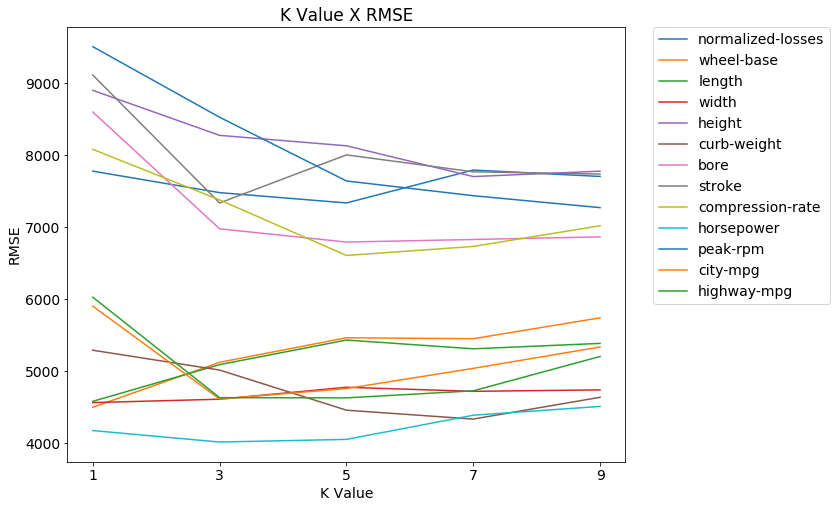

In [10]:
#plotting differing RMSE across different k values and columns
fig, ax = plt.subplots(figsize=(10,8))

for key, value in col_perf_k.items():
    plt.plot(value.keys(), value.values(), label=key)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(title='K Value X RMSE',
       xlabel='K Value',
       xticks=(1,3,5,7,9),
       ylabel='RMSE')

The default k value of 5 does not have the lowest RMSE value for some of the columns. Before we decide to choose the optimal k value, we should choose the most effective features before we move on. Starting from the top 2 features and finishing with the top 5 features, we'll try to see which combination of features result in the lowest RMSE value. Let's first average out the RMSE value for each features with varying k values from the previous analysis.

# Identifying Top Features

In [11]:
top_columns = {}
for key, value in col_perf_k.items():
    top_columns[key] = np.mean(list(value.values()))
top_columns = pd.Series(top_columns).sort_values()
top_columns

horsepower           4223.530357
width                4678.052063
curb-weight          4743.330761
highway-mpg          5040.509230
city-mpg             5126.515991
length               5156.973125
wheel-base           5252.436179
compression-rate     7164.249800
bore                 7213.387243
normalized-losses    7619.681739
stroke               7993.732370
peak-rpm             8078.822375
height               8159.606698
dtype: float64

We will focus on `horsepower`, `width`, `curb-weight`, `highway-mpg`, and `city-mpg` features in the next optimization.

In [12]:
def knn_train_test(train_cols, target_col, data):
    
    #randomizing index and reindexing
    np.random.seed(1)
    index = np.random.permutation(data.index)
    data = data.reindex(index)
    
    #splitting dataset into training and testing
    train = data.iloc[:(round(len(data)/2))]
    test = data.iloc[(round(len(data)/2)):]
    
    knn = KNeighborsRegressor()
    knn.fit(train[train_cols], train[target_col]) #fit
    prediction = knn.predict(test[train_cols]) #predict
    rmse = np.sqrt(mean_squared_error(test[target_col], prediction)) #get error - MSE this time
    return rmse #return error

top_features = {}

for i in range(2,6):
    cols = top_columns[:i].index
    top_features[('Top ' + str(i))] = knn_train_test(cols, ['price'], num_cars)
    
top_features

{'Top 2': 3587.6781582974736,
 'Top 3': 3315.179311728235,
 'Top 4': 3364.4454402465853,
 'Top 5': 3346.3794863306603}

It seems like the optimal features to use in this model are `horsepower`, `width` and `curb-weight`. Now we'll optimized the k value using the top three models we've identified. This time, we'll also perform k-fold cross validation to bootstrap our model.

# Hyperparameter Optimization and Bootstrapping with K Fold

In [13]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(k, train_col, target_col, data):
    
    #folding with k value of 10
    kf = KFold(10, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn, data[train_col], data[target_col], 
                           scoring='neg_mean_squared_error', cv=kf)
    rmse = np.sqrt(np.abs(mses))
    return np.mean(rmse) #return mean RMSE

#top three models with its features
model_features = [list(top_columns[:3].index),
                  list(top_columns[:4].index),
                  list(top_columns[:5].index)]
model_perf_k = {}
k_vals = list(range(1,26))

for columns in model_features:
    model_perf_k[str(columns)] = {}
    for k in k_vals:
        model_perf_k[str(columns)][k] = knn_train_test(k, columns, ['price'], num_cars)

model_perf_k

{"['horsepower', 'width', 'curb-weight', 'highway-mpg', 'city-mpg']": {1: 2681.520007782177,
  2: 2773.931515275009,
  3: 2836.75826248013,
  4: 2981.9825212509027,
  5: 3012.660785907462,
  6: 3095.274726265457,
  7: 3187.687871979607,
  8: 3251.7563057713087,
  9: 3312.044701406616,
  10: 3362.8902858835345,
  11: 3491.5958110705774,
  12: 3552.8343353683813,
  13: 3645.0090745991847,
  14: 3739.651498436154,
  15: 3792.6492350125072,
  16: 3868.910346766553,
  17: 3927.6689696461326,
  18: 3983.7309282900032,
  19: 4041.1542361763654,
  20: 4101.566670504142,
  21: 4109.998991701391,
  22: 4127.473110034394,
  23: 4162.613651869616,
  24: 4163.50362806611,
  25: 4199.220784230357},
 "['horsepower', 'width', 'curb-weight', 'highway-mpg']": {1: 2570.6821033393285,
  2: 2662.9575341317973,
  3: 2720.000599881104,
  4: 2842.7876061525994,
  5: 2884.0657861961854,
  6: 3015.871377774992,
  7: 3146.1531588382495,
  8: 3273.6620206121916,
  9: 3291.585819971103,
  10: 3344.3712399723736,
 

[Text(0,0.5,'RMSE'),
 Text(0.5,0,'K Value'),
 Text(0.5,1,'K Value X RMSE')]

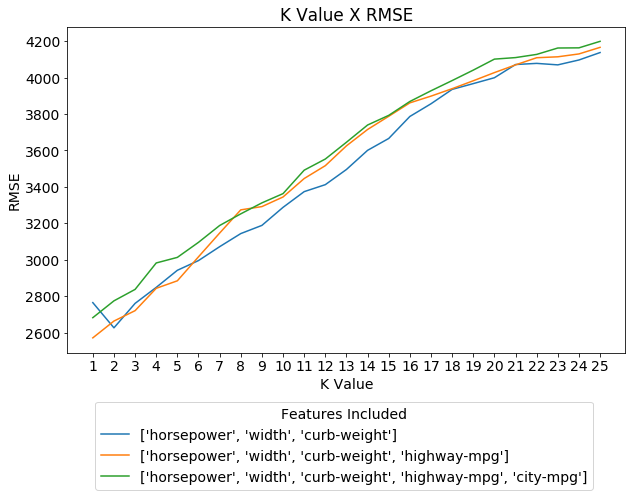

In [14]:
#plotting differing RMSE across different k values and columns
fig, ax = plt.subplots(figsize=(10,6))

for key, value in model_perf_k.items():
    plt.plot(value.keys(), value.values(), label=key)
plt.legend(title='Features Included', bbox_to_anchor=(0.05 ,-0.15), loc=2, borderaxespad=0.)
ax.set(title='K Value X RMSE',
       xlabel='K Value',
       xticks=range(1,26),
       ylabel='RMSE')

The model with the lowest RMSE has the k value of 1 and features containing `horsepower`, `width`, `curb-weight` and `highway-mpg`. 